**Conjunto de dados de rotatividade de telecomunicações**

Contexto
Você pode analisar todos os dados relevantes dos clientes e desenvolver programas focados em retenção de clientes.

Importando a base de dados

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
credito = pd.read_csv('credito.csv')

display(credito)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,M,2,na,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,M,2,mestrado,na,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62


In [134]:
credito.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             10127 non-null  object
 6   estado_civil             10127 non-null  object
 7   salario_anual            10127 non-null  object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [135]:
# Renomeando variavél
credito = credito.rename(columns={'default': 'conta'})

# Excluindo variavél
credito = credito.drop(columns={'id'})

# Convertendo variavel

display(credito)

,conta,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,1,41,M,2,na,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,1,30,M,2,mestrado,na,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62


In [136]:
# Substituindo os registros na variavél conta e salario anual
credito['conta'] = credito['conta'].replace({1: 'Padrão', 0: 'Não Padrão'}).astype(str)

credito['salario_anual'] = credito['salario_anual'].replace({})

display(credito)

,conta,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,Não Padrão,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,Não Padrão,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,Não Padrão,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,Não Padrão,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,Não Padrão,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Não Padrão,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,Padrão,41,M,2,na,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,Padrão,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,Padrão,30,M,2,mestrado,na,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62


In [137]:

# Substituir vírgulas por pontos e converter para float
credito['limite_credito'] = credito['limite_credito'].str.replace('.', '').str.replace(',', '.').astype(float)
credito['valor_transacoes_12m'] = credito['valor_transacoes_12m'].str.replace('.', '').str.replace(',', '.').astype(float)

Analisando os dados

In [138]:
idade = credito['idade'].describe()

display(round(idade,2))

count    10127.00
mean        46.33
std          8.02
min         26.00
25%         41.00
50%         46.00
75%         52.00
max         73.00
Name: idade, dtype: float64

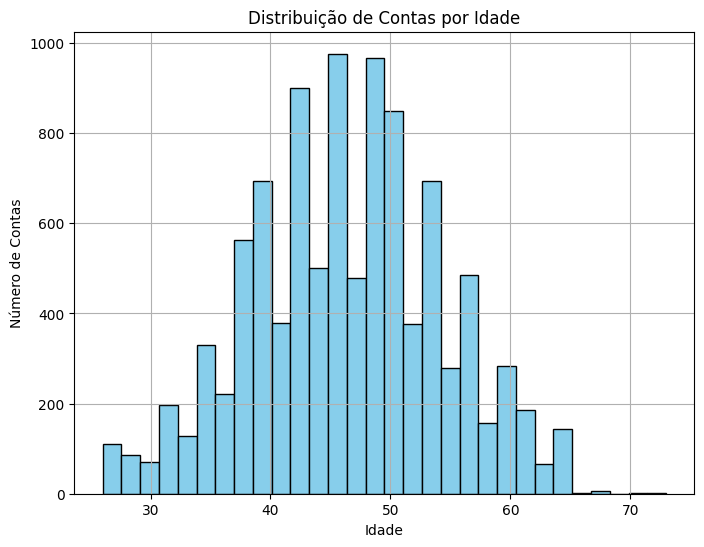

In [139]:
# Perfil Demográfico e Financeiro:

# 1. Distribuição de contas por idade (Histograma)
plt.figure(figsize=(8, 6))
plt.hist(credito['idade'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Idade')
plt.ylabel('Número de Contas')
plt.title('Distribuição de Contas por Idade')
plt.grid(True)
plt.show()

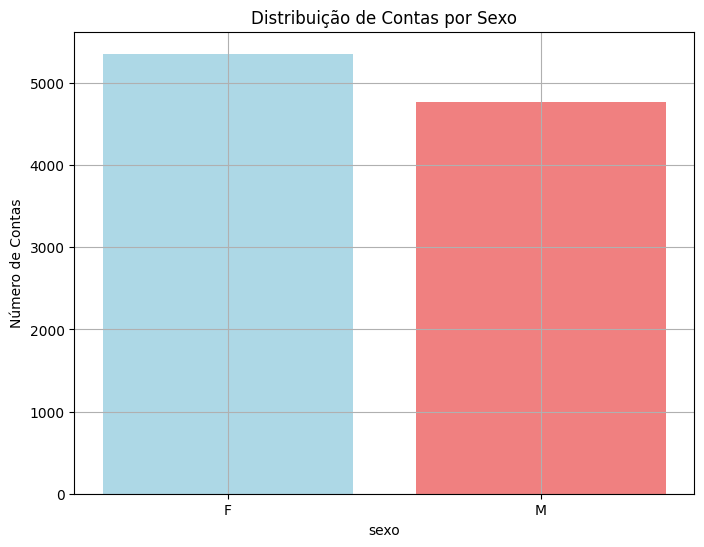

sexo
F    0.53
M    0.47
Name: proportion, dtype: float64


In [140]:
# Distribuição de contas por sexo

# Contagem de contas por sexo
contagem_sexo = credito['sexo'].value_counts()

# Distribuição de sexo por conta (Histograma)
plt.figure(figsize=(8, 6))
plt.bar(contagem_sexo.index, contagem_sexo.values, color=['lightblue', 'lightcoral'])
plt.xlabel('sexo')
plt.ylabel('Número de Contas')
plt.title('Distribuição de Contas por Sexo')
plt.grid(True)
plt.show()

# Analisando a contagem percentual
contagem_sexo = credito['sexo'].value_counts(normalize='True')
print(round(contagem_sexo,2))

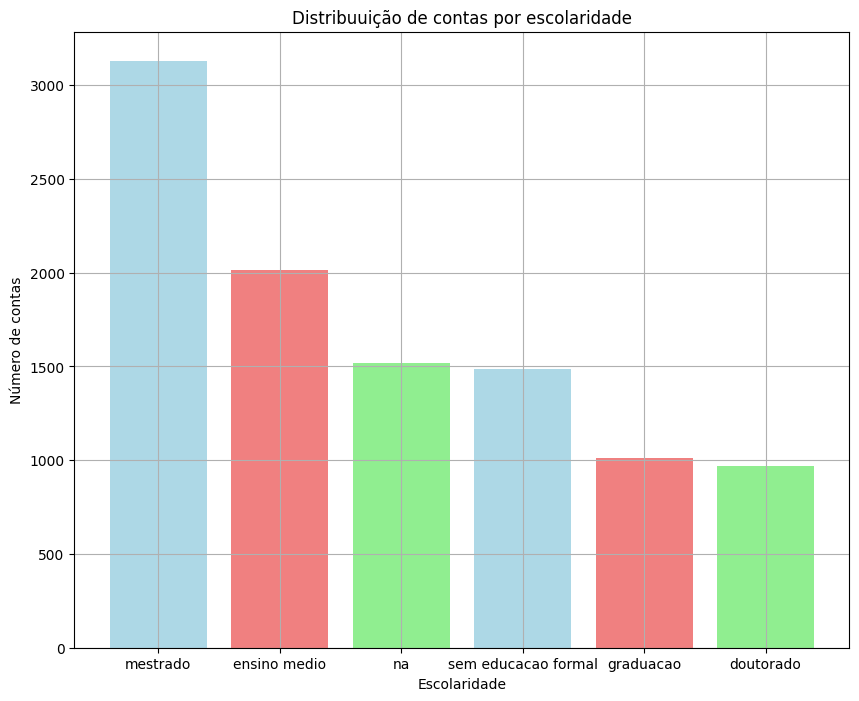

escolaridade
mestrado               0.3089
ensino medio           0.1988
na                     0.1500
sem educacao formal    0.1468
graduacao              0.1000
doutorado              0.0955
Name: proportion, dtype: float64


In [141]:
# Distribuição de contas por escolaridade 

contagem_escolaridade = credito['escolaridade'].value_counts()

# Distribuição de escolaridade por contas
plt.figure(figsize=(10,8))

plt.bar(contagem_escolaridade.index, contagem_escolaridade.values, color=['lightblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Escolaridade')
plt.ylabel('Número de contas')
plt.title('Distribuuição de contas por escolaridade')
plt.grid(True)
plt.show()

# Analisando a contagem percentual
contagem_escolaridade = credito['escolaridade'].value_counts(normalize='True')
print(round(contagem_escolaridade,4))


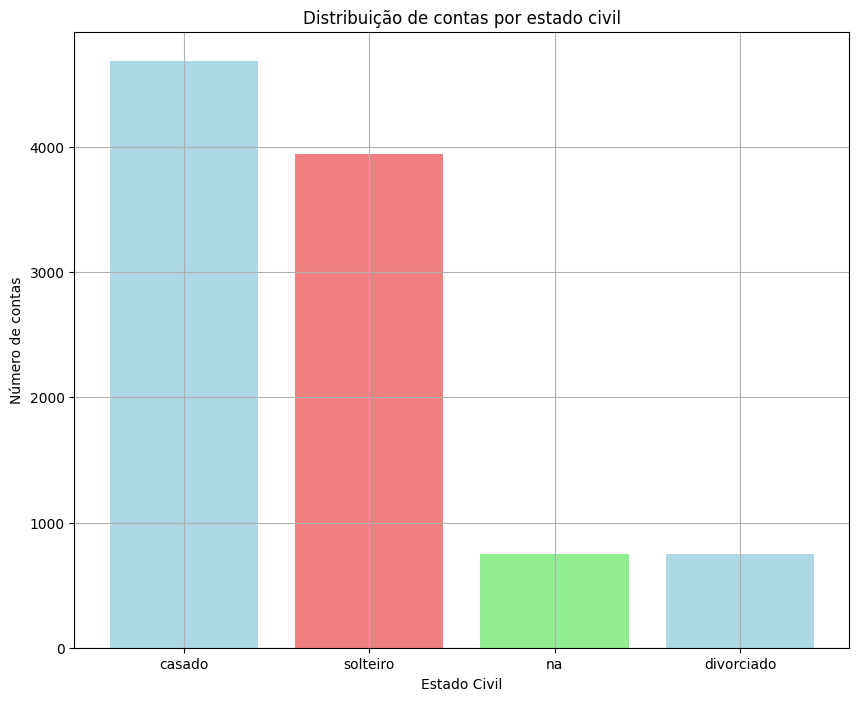

estado_civil
casado        0.4628
solteiro      0.3894
na            0.0740
divorciado    0.0739
Name: proportion, dtype: float64


In [142]:
# Distribuição de contas por estado civil?
contagem_estado_civil = credito['estado_civil'].value_counts()

# Distribuição do estado civil por contas
plt.figure(figsize=(10,8))

plt.bar(contagem_estado_civil.index, contagem_estado_civil.values, color=['lightblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Estado Civil')
plt.ylabel('Número de contas')
plt.title('Distribuição de contas por estado civil')
plt.grid(True)
plt.show()

# Analisando a contagem percentual
contagem_estado_civil = credito['estado_civil'].value_counts(normalize='True')
print(round(contagem_estado_civil,4))

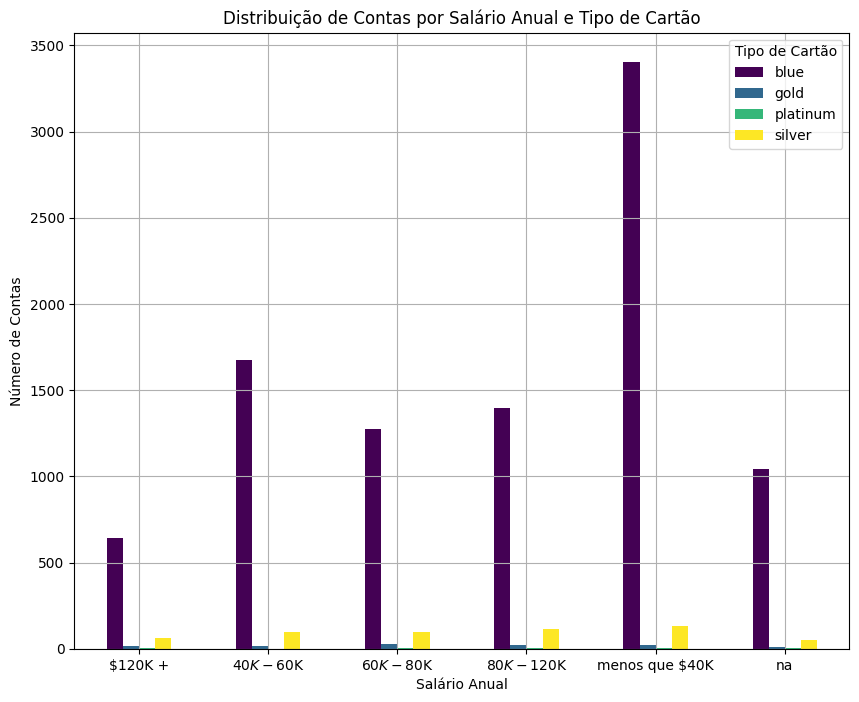

In [143]:
# Como o salário anual varia com o tipo de cartão de crédito?

contagem_salario_cartao = credito.groupby(['salario_anual', 'tipo_cartao']).size().unstack()

# Gráfico de Barras
contagem_salario_cartao.plot(kind='bar', figsize=(10, 8), rot=0, colormap='viridis')
plt.xlabel('Salário Anual')
plt.ylabel('Número de Contas')
plt.title('Distribuição de Contas por Salário Anual e Tipo de Cartão')
plt.grid(True)
plt.legend(title='Tipo de Cartão')
plt.show()


tipo_cartao
blue        35.96
gold        35.53
platinum    36.25
silver      35.45
Name: meses_de_relacionamento, dtype: float64


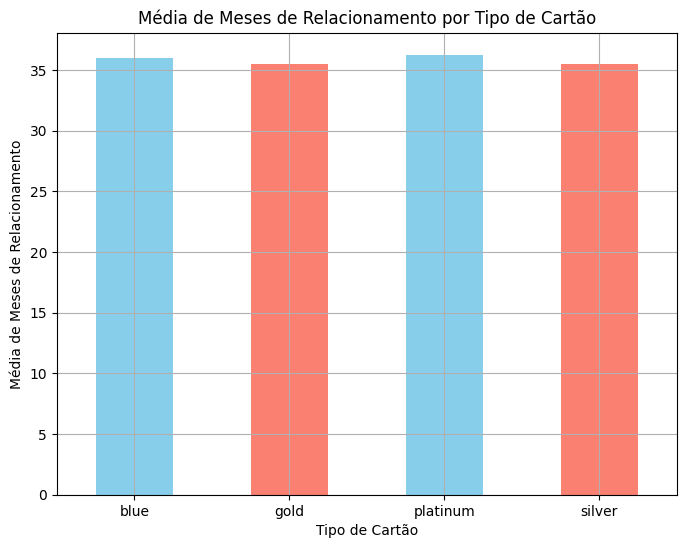

In [144]:
# Comportamento de Transações e Relacionamento:

# Qual é a média de meses de relacionamento por tipo de cartão?
media_meses_relacionamento = credito.groupby('tipo_cartao')['meses_de_relacionamento'].mean()

print(round(media_meses_relacionamento,2))

media_meses_relacionamento.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])

plt.xlabel('Tipo de Cartão')
plt.ylabel('Média de Meses de Relacionamento')
plt.title('Média de Meses de Relacionamento por Tipo de Cartão')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

C:\Users\55119\AppData\Local\Temp\ipykernel_33980\897249156.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_valor_transacoes_por_cartao.index, y=media_valor_transacoes_por_cartao.values, palette='viridis')


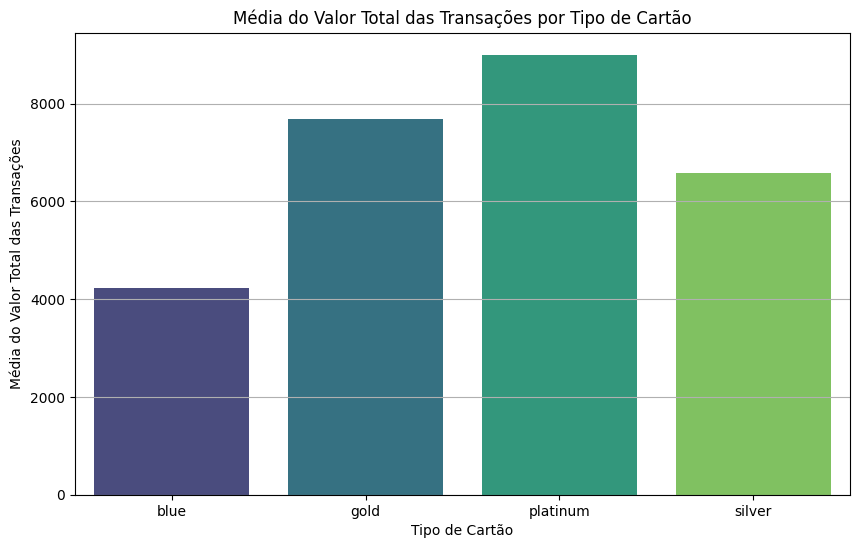

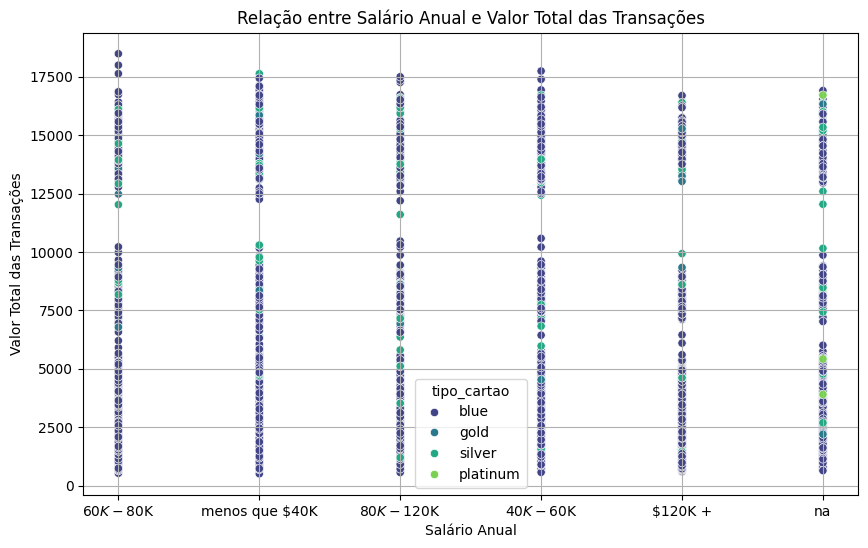

In [147]:
# 1. Média do valor total das transações por tipo de cartão
media_valor_transacoes_por_cartao = credito.groupby('tipo_cartao')['valor_transacoes_12m'].mean()

# Plotar gráfico de barras para média do valor total das transações por tipo de cartão
plt.figure(figsize=(10, 6))
sns.barplot(x=media_valor_transacoes_por_cartao.index, y=media_valor_transacoes_por_cartao.values, palette='viridis')
plt.xlabel('Tipo de Cartão')
plt.ylabel('Média do Valor Total das Transações')
plt.title('Média do Valor Total das Transações por Tipo de Cartão')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

# 2. Relação entre o salário anual e o valor total das transações
plt.figure(figsize=(10, 6))
sns.scatterplot(data=credito, x='salario_anual', y='valor_transacoes_12m', hue='tipo_cartao', palette='viridis')
plt.xlabel('Salário Anual')
plt.ylabel('Valor Total das Transações')
plt.title('Relação entre Salário Anual e Valor Total das Transações')
plt.grid(True)

plt.show()

plt.show()

C:\Users\55119\AppData\Local\Temp\ipykernel_33980\2431994252.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_transacoes_por_salario.index, y=media_transacoes_por_salario.values, palette='viridis')


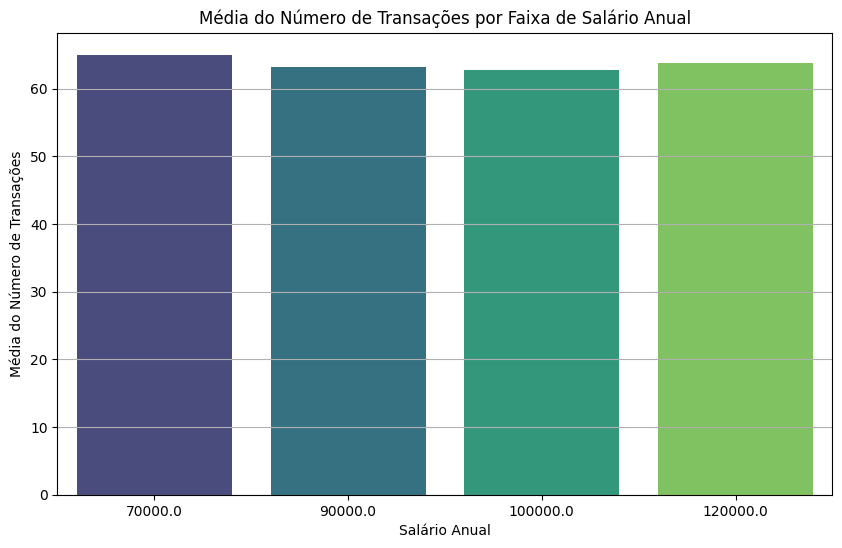

C:\Users\55119\AppData\Local\Temp\ipykernel_33980\2431994252.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=credito, x='qtd_produtos', y='qtd_transacoes_12m', palette='viridis')


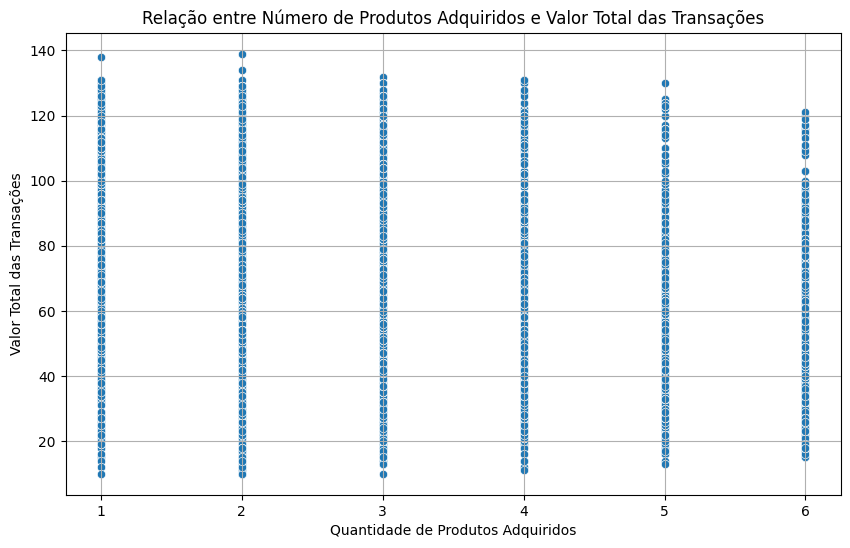

In [153]:
# 1. Média do número de transações por faixa de salário anual
media_transacoes_por_salario = credito.groupby('salario_anual')['qtd_transacoes_12m'].mean()

# Plotar gráfico de barras para média do número de transações por faixa de salário anual
plt.figure(figsize=(10, 6))
sns.barplot(x=media_transacoes_por_salario.index, y=media_transacoes_por_salario.values, palette='viridis')
plt.xlabel('Salário Anual')
plt.ylabel('Média do Número de Transações')
plt.title('Média do Número de Transações por Faixa de Salário Anual')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

# 2. Relação entre o número de produtos adquiridos e o valor total das transações
plt.figure(figsize=(10, 6))
sns.scatterplot(data=credito, x='qtd_produtos', y='qtd_transacoes_12m', palette='viridis')
plt.xlabel('Quantidade de Produtos Adquiridos')
plt.ylabel('Valor Total das Transações')
plt.title('Relação entre Número de Produtos Adquiridos e Valor Total das Transações')
plt.grid(True)

plt.show()

In [155]:
table = credito['estado_civil'].value_counts()
display(table)

estado_civil
casado        4687
solteiro      3943
na             749
divorciado     748
Name: count, dtype: int64

**Conclusão**


Contas: 

Pode-se concluir que a maioria das contas é mantida por indivíduos nas faixas etárias intermediárias (35 á 55 anos), conforme indicado pela maior concentração de barras nesses grupos etários. A distribuição sugere que os grupos mais jovens (em torno de 20 anos) e mais velhos (em torno de 70 anos) têm menos contas. Isso pode implicar que a população de meia-idade está mais engajada com o serviço ou produto relacionado a essas contas, o que pode ser um público-alvo importante para fins de análise de mercado.

O público feinino é maioria sendo 53% de contas abertas e 47% para os homens.

Média de Meses de Relacionamento por Tipo de Cartão, está em cerca de 35 messes, sendo o cartão platinum e o blue com maior tempo acima da média, o tipo platinum também lidera o número de transações (maior que 8.000), seguido pelo cartão gold e silver.

Não há uma correlação clara entre o salário anual e o valor total das transações para diferentes tipos de cartões. A distribuição dos valores de transação parece relativamente consistente em todas as faixas salariais para cada tipo de cartão.

Nesse gráfico, podemos observar que à medida que a quantidade de produtos adquiridos aumenta, não há um aumento significativo no valor total das transações. Os pontos de dados estão principalmente dispersos na parte inferior do gráfico, sugerindo que comprar mais produtos não necessariamente se correlaciona com um valor de transação mais alto.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Clientes:

Nível de Ensino Médio é o Mais Comum: O maior número de contas está associado ao nível de ensino médio. Isso sugere que a maioria dos titulares de contas possui esse nível de educação.

Graduação e Sem Educação Formal São Próximos: Os níveis de graduação e sem educação formal têm quantidades semelhantes de contas. Isso indica que pessoas com esses níveis de educação também são representativas.

Mestrado e Doutorado Têm Menos Contas: Os níveis de mestrado e doutorado têm o menor número de contas. Isso sugere que indivíduos com esses graus avançados são menos comuns entre os titulares de contas.

O número de contas dos casados e solteiros detêm mais contas do que divorciados ou aqueles em uma categoria não especificada.

O tipo de cartão mais consumido pelos clientes é o "Blue" em todas as faixas etárias de rendas por clientes, sendo os clientes de renda menor que 40 mil por ano com maiores indíces, seguido pela faixa de 40 á 60 mil por ano.

Existe uma tendência de que o número médio de transações também aumente. Isso pode indicar que indivíduos com salários mais altos realizam, em média, mais transações do que aqueles com salários mais baixos. Aqui estão os detalhes:

A primeira barra representa a faixa salarial até 70.000,0.
A segunda barra representa a faixa salarial até 90.000,0.
A terceira barra representa a faixa salarial até 100.000,0.
A quarta barra representa a faixa salarial até 120.000,0.